<a href="https://colab.research.google.com/github/Ankurita/Youtibe-Trending-data-analysis-worldwide/blob/master/Youtube_video_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [6]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [15]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving IN_youtube_trending_data.csv to IN_youtube_trending_data.csv


In [18]:
import pandas as pd 
import io 
  
df1 = pd.read_csv(io.BytesIO(uploaded['IN_youtube_trending_data.csv'])) 
print(df1)
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')


         video_id  ...                                        description
0     Iot0eF6EoNA  ...  Three Streams. Three Stories. One Journey. Sta...
1     x-KbnJ9fvJc  ...  Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2     KX06ksuS6Xo  ...  CLASH official music video performed by DILJIT...
3     UsMRgnTcchY  ...  Gulshan Kumar and T-Series presents Bhushan Ku...
4     WNSEXJJhKTU  ...  VYRL Originals brings to you ‘Baarish’ - the b...
...           ...  ...                                                ...
8041  Dj4rGHzc-3A  ...  In Punjab and Haryana, farmers have been prote...
8042  PuhJ7oiqjAA  ...  Order Tru Hair here :https://bit.ly/2ZACnDOCas...
8043  a6Ryl7PswH0  ...  In this video we have shared Samsung Galaxy  M...
8044  NUllhAdORXU  ...  Watch Halahal full movie streaming on Eros Now...
8045  b1c6i0VT7ak  ...  Geet MP3 & GK Digital Presenting Official Vide...

[8046 rows x 16 columns]
There are 8046 rows and 16 columns


In [20]:
df1.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


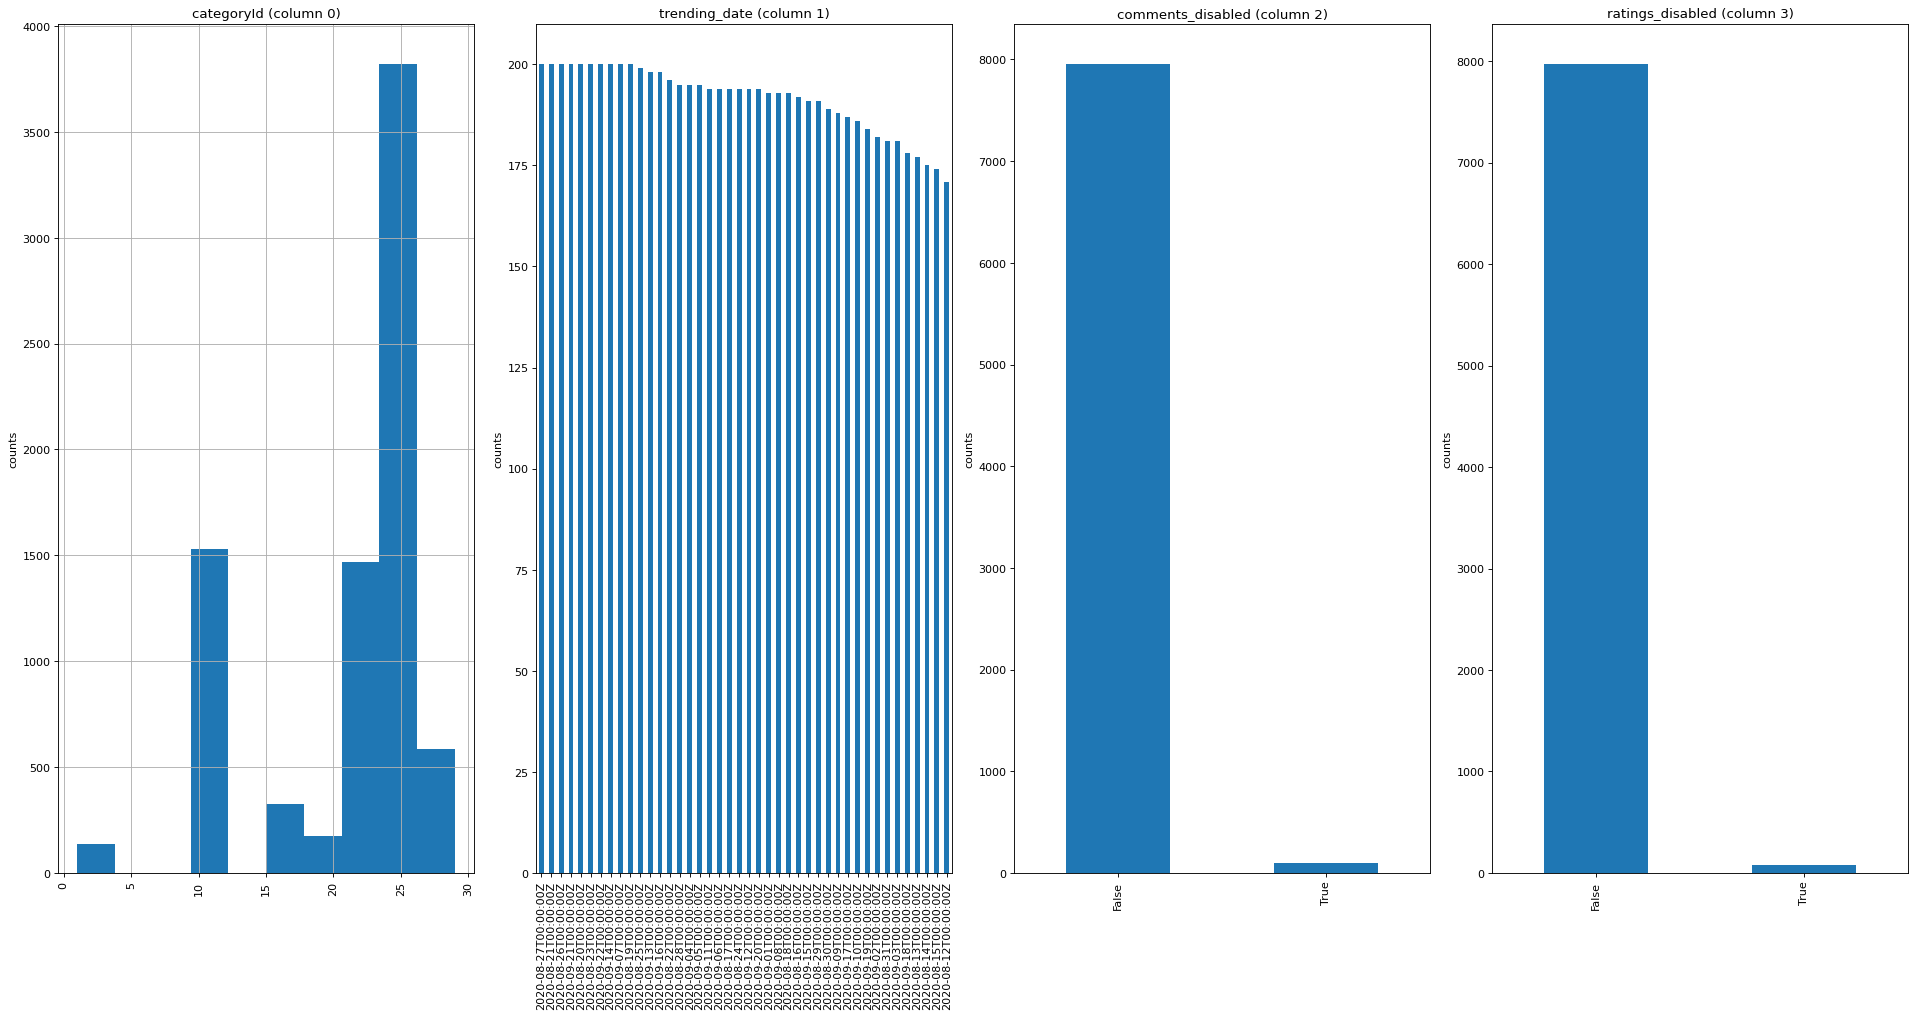

In [21]:
plotPerColumnDistribution(df1, 10, 5)

Pandas proffiling


In [22]:
pip install pandas-profiling


In [34]:
import seaborn as sns
import matplotlib 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                   categoryId  view_count  ...  comments_disabled  ratings_disabled
categoryId           1.000000   -0.182190  ...           0.078285          0.042315
view_count          -0.182190    1.000000  ...           0.066957         -0.017571
likes               -0.178088    0.912367  ...          -0.009615         -0.021424
dislikes            -0.012805    0.276058  ...          -0.002769         -0.006197
comment_count       -0.131312    0.834457  ...          -0.012240         -0.009851
comments_disabled    0.078285    0.066957  ...           1.000000         -0.010687
ratings_disabled     0.042315   -0.017571  ...          -0.010687          1.000000

[7 rows x 7 columns]


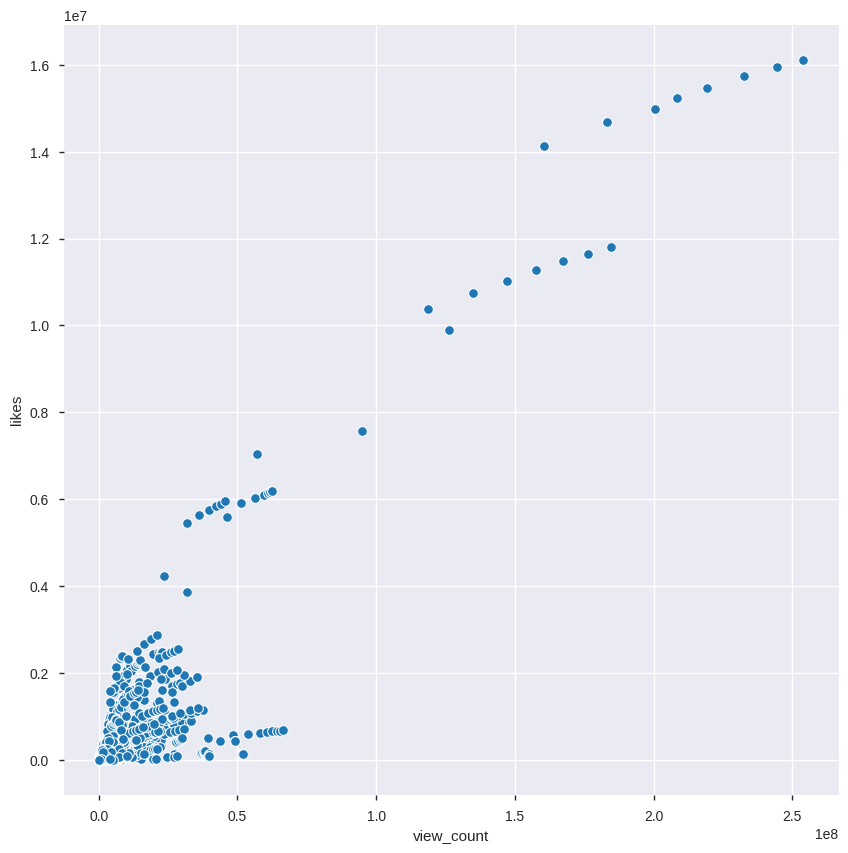

In [37]:
df1_c=df1[['view_count', 'likes']]
corr = df1.corr()
print(corr)
matplotlib.pyplot.figure(figsize=(10,10))
sns.scatterplot(x=df1["view_count"], y=df1["likes"])

Observation
1.Initially the likes grows proportionally to veiws. However as the views surpases a limit/threshold, the likes become rarer.
2.Most videos can cross a threshold of 0.2*1e8 in views and 3000000 likes around
3.

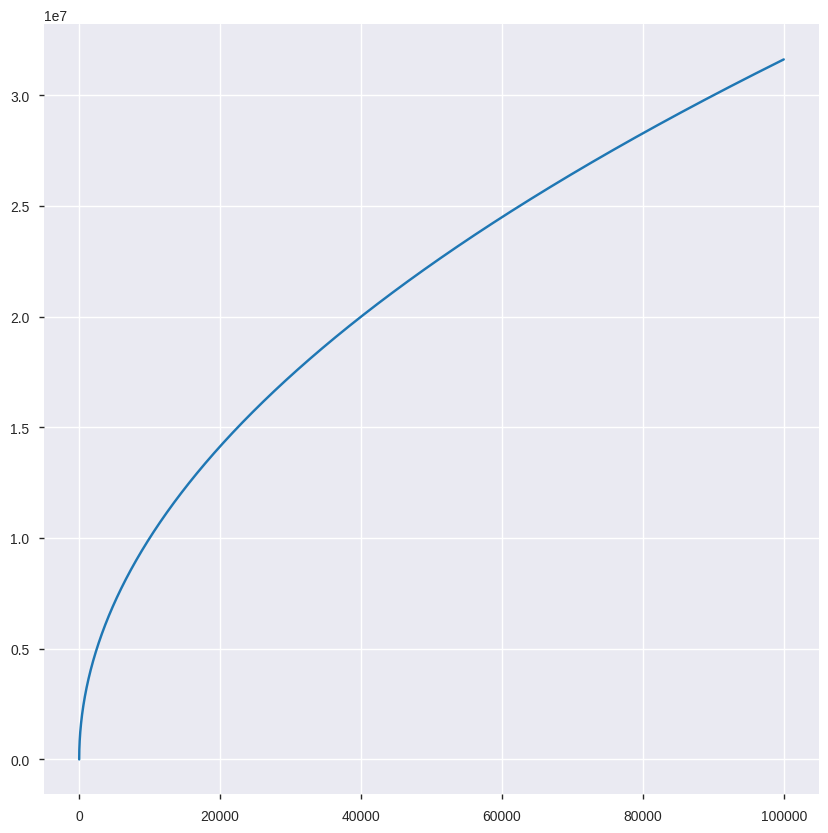

In [39]:
from matplotlib import pyplot as plt
import numpy as np
K = 100000
x = np.arange(K)
y = K * np.sqrt(x)
plt.figure(figsize=(10,10))
plt.plot(x,y)

The curve follows the realtionship of:
            likes=K*Sqrt(views)
Where K can be in terms of millions/billions, depending on the reach of videos.

In [46]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving BR_youtube_trending_data.csv to BR_youtube_trending_data (1).csv


In [47]:
import pandas as pd 
import io 
  
df_br = pd.read_csv(io.BytesIO(uploaded['BR_youtube_trending_data.csv'])) 
print(df_br)
nRow, nCol = df_br.shape
print(f'There are {nRow} rows and {nCol} columns')

         video_id  ...                                        description
0     s9FH4rDMvds  ...  Salve rapaziada, neste vídeo me declarei pra e...
1     jbGRowa5tIk  ...  ITZY Not Shy M/V[ITZY Official] https://www.yo...
2     3EfkCrXKZNs  ...  Se inscrevam meus amores! 📬 Quer nos mandar al...
3     gBjox7vn3-g  ...  Você se unirá aos Lunari e aos Solari em Targo...
4     npoUGx7UW7o  ...  Danilo Gentili recebe Thammy Miranda. Após pas...
...           ...  ...                                                ...
8394  fSW3f2t6eek  ...  Após as aulas, os vídeos estarão disponíveis n...
8395  1t4SDxzcOvc  ...  BORA BATER 10M AQUI!Se inscreva e mande o cana...
8396  RQDEawpJXX4  ...  COMPRE O LIVRO AQUI: https://amzn.to/3dnCmXSCo...
8397  j7Pu6P-g9rY  ...  SIGAM MEU GRUPO NO TELEGRAM, PRA GENTE CONVERS...
8398  23gVqaGVYYA  ...  ➭ CLIQUE AQUI PARA SE INSCREVER https://www.yo...

[8399 rows x 16 columns]
There are 8399 rows and 16 columns


In [48]:
df_br.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e..."
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...


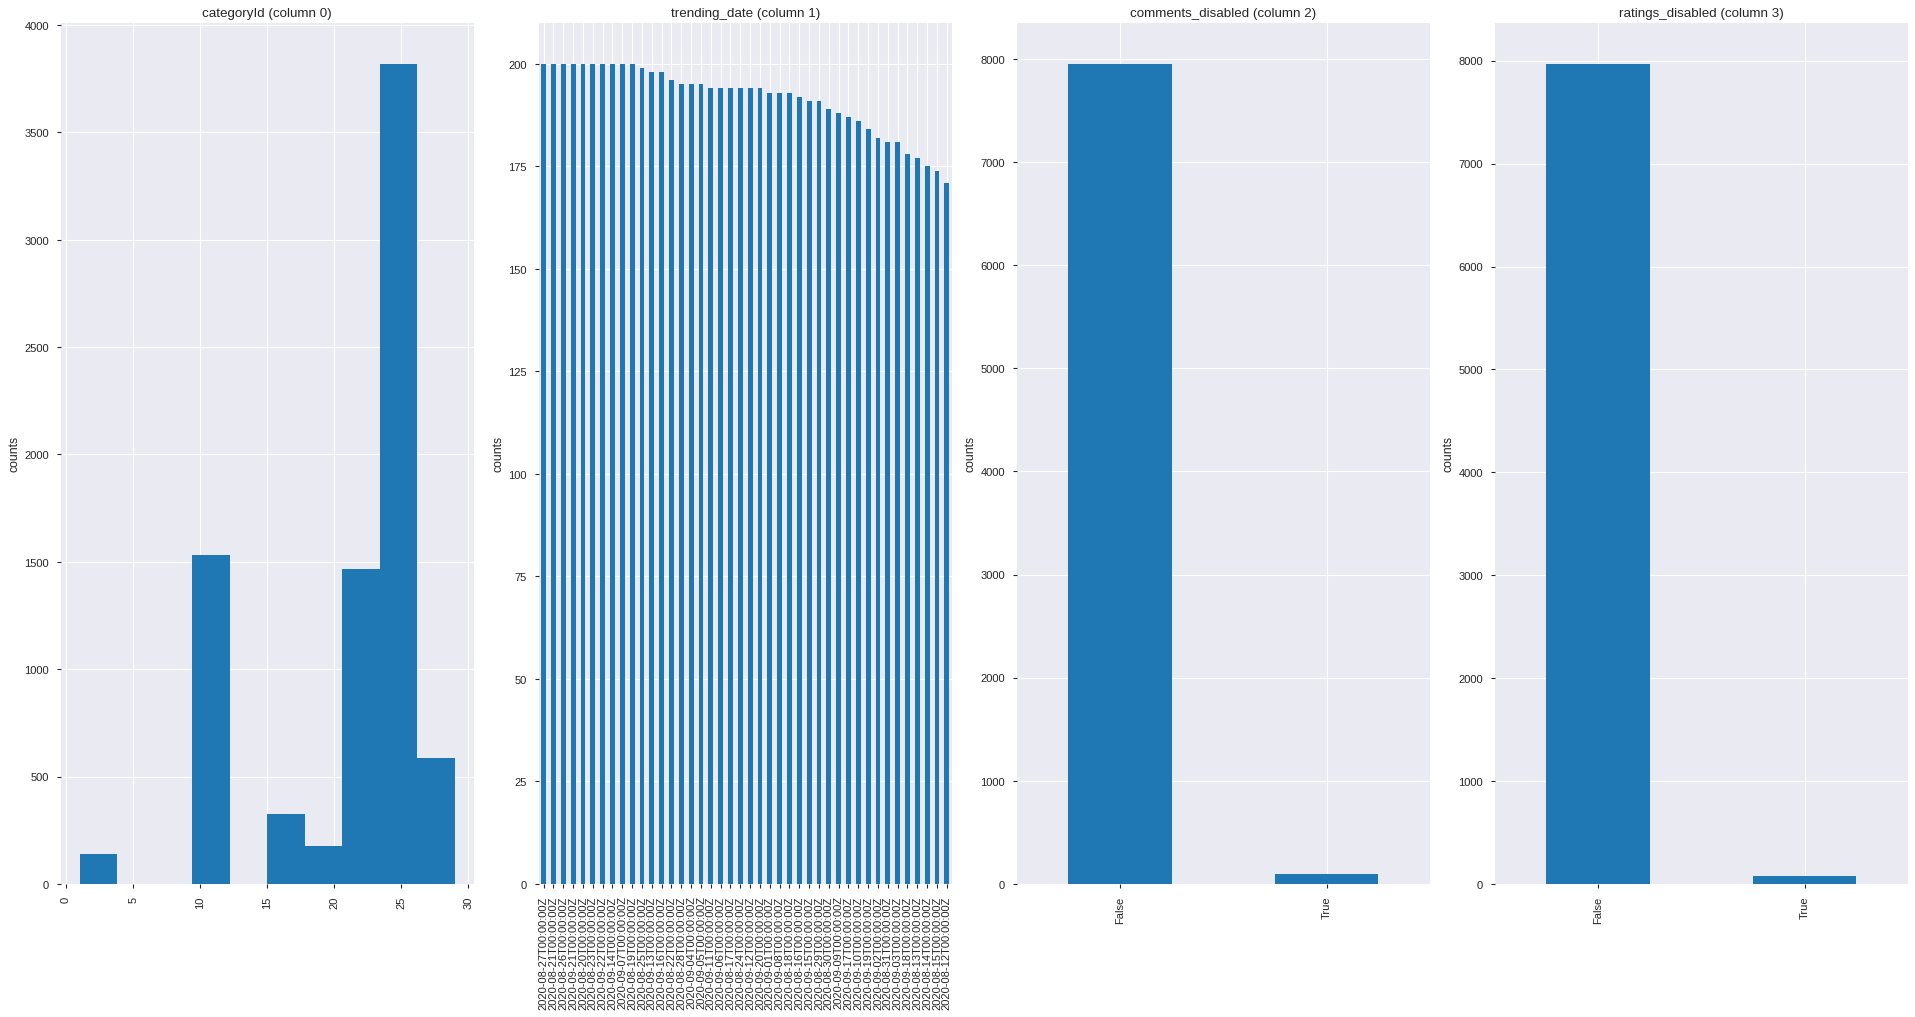

In [49]:
plotPerColumnDistribution(df1, 10, 5)

In [50]:
import seaborn as sns
import matplotlib 

                   categoryId  view_count  ...  comments_disabled  ratings_disabled
categoryId           1.000000   -0.106136  ...           0.056636          0.007026
view_count          -0.106136    1.000000  ...           0.004858          0.014505
likes               -0.104217    0.948059  ...          -0.005305         -0.010680
dislikes            -0.075042    0.922349  ...           0.009983         -0.005354
comment_count       -0.069250    0.917057  ...          -0.007236         -0.001271
comments_disabled    0.056636    0.004858  ...           1.000000         -0.004623
ratings_disabled     0.007026    0.014505  ...          -0.004623          1.000000

[7 rows x 7 columns]


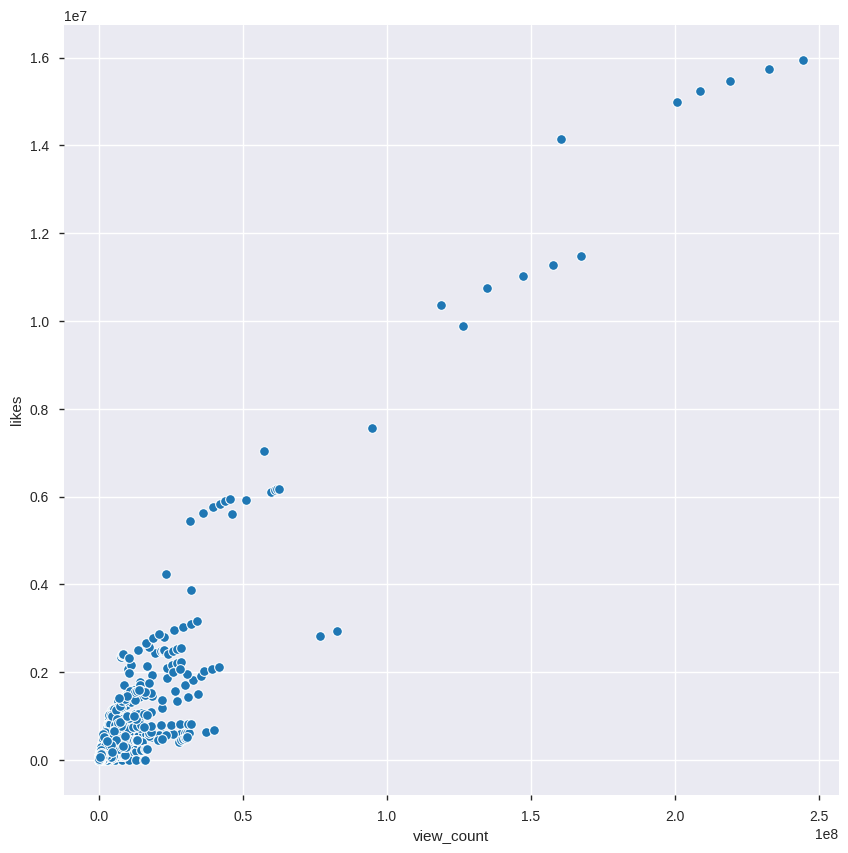

In [51]:
df_br_1=df_br[['view_count', 'likes']]
corr = df_br.corr()
print(corr)
matplotlib.pyplot.figure(figsize=(10,10))
sns.scatterplot(x=df_br["view_count"], y=df_br["likes"])

In [52]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving CA_youtube_trending_data.csv to CA_youtube_trending_data.csv


In [53]:
import pandas as pd 
import io 
  
df_ca = pd.read_csv(io.BytesIO(uploaded['CA_youtube_trending_data.csv'])) 
print(df_ca)
nRow, nCol = df_ca.shape
print(f'There are {nRow} rows and {nCol} columns')

         video_id  ...                                        description
0     KX06ksuS6Xo  ...  CLASH official music video performed by DILJIT...
1     J78aPJ3VyNs  ...  I left youtube for a month and this is what ha...
2     M9Pmf9AB4Mo  ...  While running her own modding shop, Ramya Pare...
3     3C66w5Z0ixs  ...  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
4     VIUo6yapDbc  ...  Transforming The LaBrant Family's empty white ...
...           ...  ...                                                ...
8395  GX04Wy-tJGU  ...  Pre-order NHL 21 Great Eight Edition and get 3...
8396  Zo-53aI4bRQ  ...  Aang, Sokka, Katara, Toph, and the newly induc...
8397  rmPqG_oqPuo  ...  Hear from Gareth Bale for the first time since...
8398  MH_vjfNPv70  ...  BTS (방탄소년단) is BACK! BTS returns with an incre...
8399  hECCGJVAs08  ...  Unboxing the new Apple Watch Series 6 and SE! ...

[8400 rows x 16 columns]
There are 8400 rows and 16 columns


In [54]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving DE_youtube_trending_data.csv to DE_youtube_trending_data.csv


In [55]:
import pandas as pd 
import io 
  
df_de = pd.read_csv(io.BytesIO(uploaded['DE_youtube_trending_data.csv'])) 
print(df_de)
nRow, nCol = df_de.shape
print(f'There are {nRow} rows and {nCol} columns')

         video_id  ...                                        description
0     KJi2qg5F-9E  ...  Hollywood Fanbox vorbestellen ► http://bonezmc...
1     K0vYnOn7wZI  ...  Toni gerät in Panik, als plötzlich ein Unbekan...
2     2bbn9b79LRc  ...  Mehr von unserem Trip quer durch Deutschland, ...
3     Zv-3qNnAMaM  ...  Heii Cuties,Was soll ich in kommender Zeit noc...
4     7clgQLneouU  ...  Domo hier! Abonnieren! Liken! Genießen!\r\rWen...
...           ...  ...                                                ...
8395  VRlEFT-44Ik  ...  Justice Ruth Bader Ginsburg, the Supreme Court...
8396  GcMQNy-XLWg  ...  » ENDSTATION jetzt auf allen Plattformen strea...
8397  _hFarg-Obuc  ...  사랑해떠올린 네 생각에머리가 좀 복잡해깨질 것만 같아가득한 Fantasy궁금한 My...
8398  5BeRnZ0B5pE  ...  Die neue Single BYE ab jetzt überall erhältlic...
8399  2eEZerxbPWE  ...  GENT FEAT BELAH - FLY Jetzt auf allen Online P...

[8400 rows x 16 columns]
There are 8400 rows and 16 columns


In [56]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving FR_youtube_trending_data.csv to FR_youtube_trending_data.csv


In [57]:
import pandas as pd 
import io 
  
df_fr = pd.read_csv(io.BytesIO(uploaded['FR_youtube_trending_data.csv'])) 
print(df_fr)
nRow, nCol = df_fr.shape
print(f'There are {nRow} rows and {nCol} columns')

         video_id  ...                                        description
0     7rlwxSPUcQk  ...  On a fait le test du coronavirus avec @Juju Fi...
1     AcBd_RH9JSw  ...  Abonne toi à ma chaîne ►  http://urlz.fr/4jF2N...
2     JVm8P6kKgD0  ...  My Salsa featuring Tory Lanez, extrait du nouv...
3     JfgeD7xWy-w  ...  La famille, n'hésitez pas à vous abonner et à ...
4     P3IkBxra3a8  ...  Essai de la Ducati Hypermotard 950 RVE !👕  BOU...
...           ...  ...                                                ...
8394  Gu5NvYFs1V4  ...  Après 1 an chez Apple je décide de quitter l’i...
8395  LcQgYHon15c  ...  The CrossFit Games -- (http://games.crossfit.c...
8396  bZRD9_waays  ...  Aujourd’hui notre cobaye enfile une paire d’ye...
8397  DO6T0YEiODg  ...  Ce mercredi 16 septembre au soir, nous vous do...
8398  E5cnxlObI1o  ...  Une bonne friture de goujons & de vairons pour...

[8399 rows x 16 columns]
There are 8399 rows and 16 columns


In [58]:
#from google.colab import files 
  
  
#uploaded = files.upload()

Saving GB_youtube_trending_data.csv to GB_youtube_trending_data.csv


In [59]:
from google.colab import files 
uploaded = files.upload()
import pandas as pd 
import io 
  
df_gb = pd.read_csv(io.BytesIO(uploaded['GB_youtube_trending_data.csv'])) 
print(df_gb)
nRow, nCol = df_gb.shape
print(f'There are {nRow} rows and {nCol} columns')

         video_id  ...                                        description
0     J78aPJ3VyNs  ...  I left youtube for a month and this is what ha...
1     9nidKH8cM38  ...  The first 1000 people to click the link will g...
2     M9Pmf9AB4Mo  ...  While running her own modding shop, Ramya Pare...
3     kgUV1MaD_M8  ...  Nines - Clout (Official Video)Listen to Clout ...
4     49Z6Mv4_WCA  ...  ssend love to my sponsor; for a super Limited ...
...           ...  ...                                                ...
8394  fbp0bET06wc  ...  The official video for Genesis – from our fort...
8395  xl8G1s_I5fs  ...  Listen to the official audio of Toosii's Night...
8396  SQ_28Iy_UmI  ...  Original by Phil CollinsYou can buy my albums ...
8397  0_R-a3jK2nQ  ...  Anthony Joshua and Israel Adesanya have two si...
8398  KqxQs_a8-Gk  ...  Provided to YouTube by Universal Music GroupWh...

[8399 rows x 16 columns]
There are 8399 rows and 16 columns


In [60]:
from google.colab import files   
uploaded = files.upload()
import pandas as pd 
import io 
  
df_jp = pd.read_csv(io.BytesIO(uploaded['JP_youtube_trending_data.csv'])) 
print(df_jp)
nRow, nCol = df_jp.shape
print(f'There are {nRow} rows and {nCol} columns')

Saving JP_youtube_trending_data.csv to JP_youtube_trending_data.csv
         video_id  ...                                        description
0     UYXa8R9vvzA  ...  登録者数30万人ありがとうございます！！！ご機嫌ようみなさま。お久しぶりでございます。なんか...
1     02MaoZ5n-uM  ...  言葉が出ない。スゴすぎて、異次元過ぎて、言葉が出ない。左対左、だけど何となく打ちそうな気はし...
2     ucDDYszgj5c  ...  それにしても実家に帰ってません。あまりにいつでも帰れるので逆にタイミングが難しくなってます。...
3     M9Pmf9AB4Mo  ...  While running her own modding shop, Ramya Pare...
4     tkaU_Ctzhes  ...  「銀魂」本当のラスト!最後のバカ騒ぎが、始まる!笑いも涙も宇宙規模で限界突破！『銀魂 THE...
...           ...  ...                                                ...
8392  kzSpz6SBCmg  ...  元々松尾は体力が中1女子くらいしか無いのですが、最近特に概要欄まで手を回す余裕がない事が多く...
8393  b_5GqtfvULU  ...  #小豆から3つの重大発表！！①＠小豆 初のスタイルブック　「#あずきのぜんぶ」発売決定緑色の...
8394  qdippq_MgOA  ...  こんばんは！小嶋陽菜です🤍今夜はベッドでゆったり雑談動画です🛏🌙最近あったことなど色々お話し...
8395  nh5tJ1O6OwE  ...  ◆この放送のノーカット版はアベマで公開中！無料フル視聴▷https://abe.ma/2Fq...
8396  Wt7zMGzRI2k  ...  【MV】YouTuberあるあるソング／はじめしゃちょーhttps://youtu.be/b...

[8397 rows x 16 columns]
There are 8397 row

In [61]:
from google.colab import files 
uploaded = files.upload()
import pandas as pd 
import io 
  
df_kr = pd.read_csv(io.BytesIO(uploaded['KR_youtube_trending_data.csv'])) 
print(df_kr)
nRow, nCol = df_kr.shape
print(f'There are {nRow} rows and {nCol} columns')

Saving KR_youtube_trending_data.csv to KR_youtube_trending_data.csv
         video_id  ...                                        description
0     uq5LClQN3cE  ...                                                NaN
1     I-ZbZCHsHD0  ...  오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...
2     9d7jNUjBoss  ...                                                NaN
3     3pI_L3-sMVg  ...                앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4     zrsBjYukE8s  ...  MelOn http://kko.to/TWyXd7zYjSpotify https://s...
...           ...  ...                                                ...
5861  Rr_g5dWEjKI  ...  [유형 드라마 #53]매번 사이다도 못날리고 당하기만 하는 것 같아 속상한 발랄이에...
5862  TzFRVk2ektI  ...  MAX – Blueberry Eyes (feat. SUGA of BTS) [Offi...
5863  0be2A-m9cNg  ...  ★★★More 'Omniscient' clips are available★★★iMB...
5864  4aKkOjGXB9g  ...  BTS 방탄소년단 미국 '아메리카 갓 탤런트' 에 출연! 뮤비같은 공연.. 유명인들...
5865  ETAr2CMshA8  ...  #발사탕먹는소리ASMR #졸음유발영상 #루퐁이네안녕하세요쌈바요정 루디씨와 옭옭쟁이 ...

[5866 rows x 16 columns]
There are 5866 row

In [62]:
from google.colab import files 
uploaded = files.upload()
import pandas as pd 
import io 
  
df_mx = pd.read_csv(io.BytesIO(uploaded['MX_youtube_trending_data.csv'])) 
print(df_mx)
nRow, nCol = df_mx.shape
print(f'There are {nRow} rows and {nCol} columns')

Saving MX_youtube_trending_data.csv to MX_youtube_trending_data.csv
         video_id  ...                                        description
0     SsWHMAhshPQ  ...  Vengo De Nada - Ovi x Natanael Cano x Aleman x...
1     JOaeND0xUNk  ...  Encendieron el escenario de La Voz. TV AztecaT...
2     SV91jnGs--s  ...  Si tienes 10 kg de sobre peso tal vez te haz p...
3     QgX0zn5nMyk  ...  Mira aquí el contenido exclusivo que tenemos p...
4     cKaM19oAwBM  ...  No olvides suscribirte y activar la campanita ...
...           ...  ...                                                ...
8195  aFSkt92TOXA  ...  En este vídeo vamos a ver benchmarks y pruebas...
8196  RZIQTwHAPGk  ...  Mira este capítulo completo, aquí: https://bit...
8197  LlGKzxdDbkI  ...  Acompáñenme a ver el #SHEINfashionshow este 19...
8198  0-5DgktAQxc  ...  Instalé el nuevo iOS 14 en mi iPhone y iPad OS...
8199  wbJhx8M6dyk  ...  PROBANDO IMPRESORA PARA UÑAS! 😱 Tus FOTOS en t...

[8200 rows x 16 columns]
There are 8200 row

In [65]:
from google.colab import files 
uploaded = files.upload()
import pandas as pd 
import io 
  
df_ru = pd.read_csv(io.BytesIO(uploaded['RU_youtube_trending_data.csv'])) 
print(df_ru)
nRow, nCol = df_ru.shape
print(f'There are {nRow} rows and {nCol} columns')

Saving RU_youtube_trending_data.csv to RU_youtube_trending_data (1).csv
         video_id  ...                                        description
0     e_Z6upbeYuc  ...  Новые кроссовки Reebok Classic Leather Legacy ...
1     X5j69JMlbwM  ...  #Dava #ФилиппКиркоров #Ролекс #Music С огромны...
2     FzJjlIzZlVc  ...  Это история анимация о том как я чуть не умер ...
3     oD3FOzQDuy0  ...  Вырвалась из КАРАНТИНА! Лучшее, что случилось ...
4     26gteilUAuQ  ...  🌞 Доброе утро!📻 Устанавливаем «Полный контакт»...
...           ...  ...                                                ...
8395  iwMqsKDTdQ0  ...  Prince Michael tries his best on a new cooking...
8396  zQo2C6C2tGE  ...  Watch the highlights from Chelsea's Premier Le...
8397  0FRPmwMBnkQ  ...  #dushanbe_life#life#show#Kino#Consert#kips#pra...
8398  8gSX4ml7VXg  ...  Воскресный вечер с Владимиром Соловьевым от 20...
8399  Mpdvwlnjyys  ...  Watch highlights from Tottenham Hotspur's 5-2 ...

[8400 rows x 16 columns]
There are 8400

In [64]:
from google.colab import files 
uploaded = files.upload()
import pandas as pd 
import io 
  
df_us = pd.read_csv(io.BytesIO(uploaded['US_youtube_trending_data.csv'])) 
print(df_us)
nRow, nCol = df_us.shape
print(f'There are {nRow} rows and {nCol} columns')

Saving US_youtube_trending_data.csv to US_youtube_trending_data.csv
         video_id  ...                                        description
0     3C66w5Z0ixs  ...  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1     M9Pmf9AB4Mo  ...  While running her own modding shop, Ramya Pare...
2     J78aPJ3VyNs  ...  I left youtube for a month and this is what ha...
3     kXLn3HkpjaA  ...  Subscribe to XXL → http://bit.ly/subscribe-xxl...
4     VIUo6yapDbc  ...  Transforming The LaBrant Family's empty white ...
...           ...  ...                                                ...
8395  cotyH4N1_Aw  ...  The Sony PS5 Digital Edition is priced RIGHT.X...
8396  eW7Twd85m2g  ...  The new season of The Mandalorian starts strea...
8397  DXiTt_6RbxQ  ...  A first glimpse of FNAF: Security Breach PS5 T...
8398  Zv_H_ichUmM  ...  iOS 14 has been released to all supported devi...
8399  AdKP623K6pA  ...  Final & Ultimate iOS 14 Review. All the best f...

[8400 rows x 16 columns]
There are 8400 row

EDA


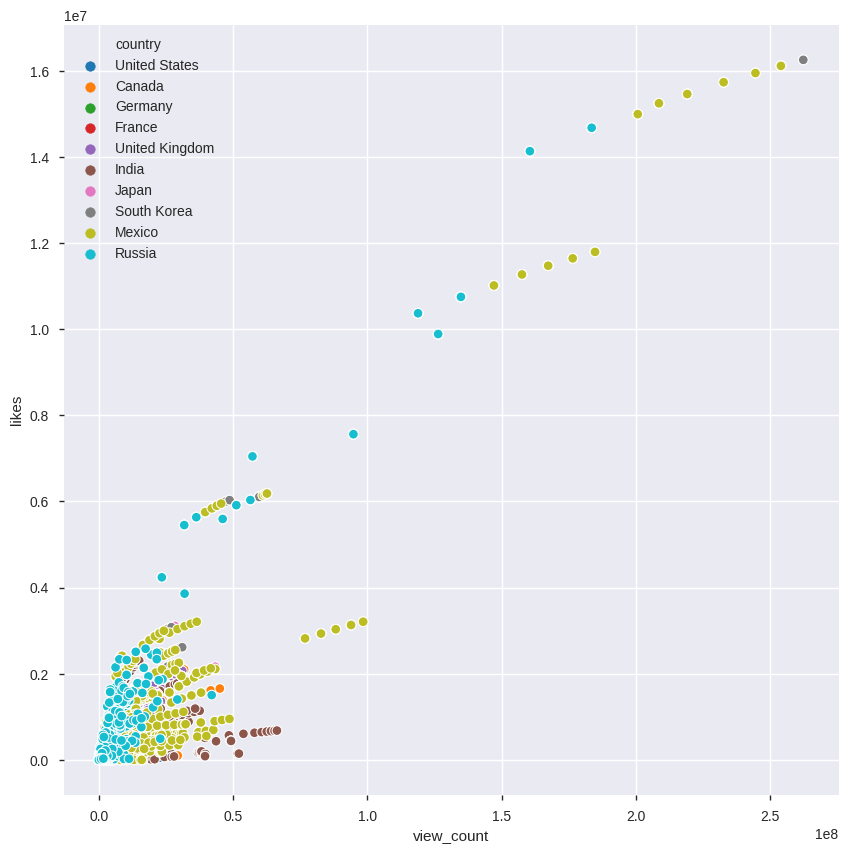

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
col_list = ['views', 'likes']

df_list = [df_us,df_ca , df_de, df_fr, df_gb, df1, df_jp, df_kr, df_mx, df_ru]
df_name_list = ['United States', 'Canada', 'Germany', 'France', 'United Kingdom', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']
                
Master_df = pd.DataFrame(columns=['view_count', 'likes', 'country'])

for i in range (len(df_list)):
    add = np.full((len(df_list[i])),df_name_list[i])
    df_list[i]['country'] = add
    Master_df = pd.merge(Master_df,df_list[i], how='outer')
    
matplotlib.pyplot.figure(figsize=(10,10))
sns.scatterplot(x=Master_df["view_count"], y=Master_df["likes"], hue=Master_df["country"])

Hence, the trend is similar for most countries.
One explaination for this observation can be less veiwed videos are watched by supporters/binge watchers, who have a tendency to like, while more viewed data is also shown to people incative on youtube, who have less tendency to give a like

Hence Like/View ratio should fall as the views increases.¶


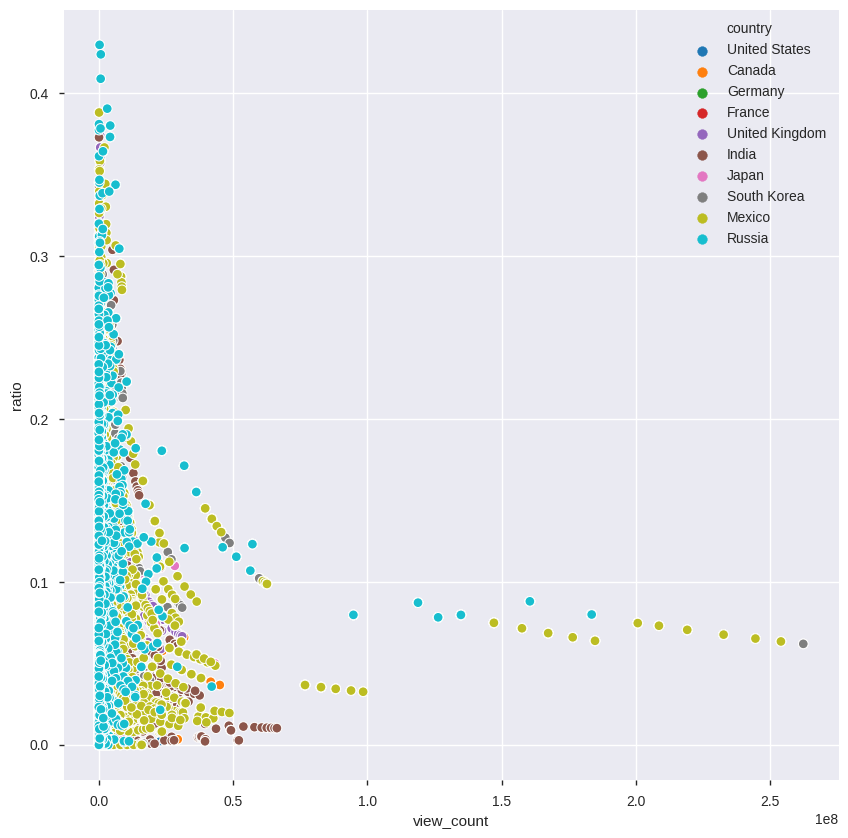

In [74]:
# for i in range(0,len(Master_df)):
views = Master_df["view_count"]
likes = Master_df["likes"]
ratio = likes/views
Master_df["ratio"] = ratio
matplotlib.pyplot.figure(figsize=(10,10))
sns.scatterplot(x=Master_df["view_count"], y=Master_df["ratio"], hue=Master_df["country"])

This graph clearly proves the above explaination to be correct.¶